<a href="https://colab.research.google.com/github/michalinahulak/fiber_optic_sensor_project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

# Usefull shorts

*   ipa - Isopropylic Alcohol
*   H2O - water


# Functions

In [2]:
# Read dataset - usefull only for uploading dataset directly from someones google drive

def read_dataset(path1, path2, path3, number):
  path_1 = 'https://drive.google.com/uc?export=download&id='+path1.split('/')[-2]
  col_names = ['air wavelength', 'air amplitude']
  dataset1 = pd.read_csv(path_1, names=col_names, header=None)

  path_2 = 'https://drive.google.com/uc?export=download&id='+path2.split('/')[-2]
  col_names = ['ipa wavelength', 'ipa amplitude']
  dataset2 = pd.read_csv(path_2, names=col_names, header=None)

  path_3 = 'https://drive.google.com/uc?export=download&id='+path3.split('/')[-2]
  col_names = ['H2O wavelength', 'H2O amplitude']
  dataset3 = pd.read_csv(path_3, names=col_names, header=None)

  # concat
  dataset = pd.concat([dataset1, dataset2, dataset3], axis=1)

  #add new colum with the number of sensor sample
  dataset['Number of sensor'] = f'Sensor {number}'

  return dataset

In [3]:
# Line plot for selected sensor sample
def lineplot (sensor):
    
  fig, ax = plt.subplots(figsize = (5,2)) 

  ax.plot(dataset.loc[dataset['Number of sensor'] == sensor, 'air wavelength'], 
          dataset.loc[dataset['Number of sensor'] == sensor,'air amplitude'], 
          label='Air', color = 'blue') 

  ax.plot(dataset.loc[dataset['Number of sensor'] == sensor,'ipa wavelength'], 
          dataset.loc[dataset['Number of sensor'] == sensor,'ipa amplitude'], 
          label='Isopropylic Alcohol', color = 'orange')
  
  ax.plot(dataset.loc[dataset['Number of sensor'] == sensor,'H2O wavelength'], 
          dataset.loc[dataset['Number of sensor'] == sensor,'H2O amplitude'], 
          label='Water', color = 'green')
  
  ax.grid() 
  ax.legend(loc='lower left')
  ax.set_title(f'Lineplot for {sensor}') 
  ax.set_xlabel('Wavelength [nm]')
  ax.set_ylabel('Amplitude [dB]')

  plt.show()

In [4]:
def heatmap(df, title):
  ax = sns.heatmap(dataset.corr(),
                 xticklabels=dataset.corr().columns,
                 yticklabels=dataset.corr().columns,
                 cmap='Blues', 
                 vmin=-1, vmax=1,
                 annot=True, 
                 center=0
                 )


  plt.title(f'{title}', fontsize=20)
  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom +0.25, top -0.25)
  plt.show()

In [5]:
# Modeling 

def modeling(x, y, model):
  X = x
  y = y

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

  model = model
  model.fit(X_train, y_train)
  preds_val = model.predict(X_val)
  preds_test = model.predict(X_test)
  print(f'Metrics for {model}')
  print("Validation : Mean absolute error: ", mean_absolute_error(y_val, preds_val))
  print("Validation: R2 score: ",r2_score(y_val, preds_val))
  print("Test : Mean absolute error: ", mean_absolute_error(y_test, preds_test))
  print("Test: R2 score: ",r2_score(y_test, preds_test))

# Upload dataset

## Upload directly from someones google drive
!! This method is time consuming and the downloading of files is not automatic. In the future, use the os/glob/Path libraries to automatically load files !!

So, once I could upload files, I download ready dataset. Unhide the cells only if you want to check how I uploaded files.

In [ ]:
set1 = read_dataset('https://drive.google.com/file/d/1LM9mCShE-5yAtVYFmjvT8gqgnCr9s2rW/view?usp=share_link',
             'https://drive.google.com/file/d/17DfvpSqYgEA4R_DijRwWgS7XsUXZeYkS/view?usp=share_link',
             'https://drive.google.com/file/d/1TGUQyhJjhDx3qp05e4Zfv6Z20DLUur4y/view?usp=share_link',
             1)
set2 = read_dataset('https://drive.google.com/file/d/148xK-bCWO35H9wrOJQDu5dGsHOPWy68C/view?usp=share_link',
                    'https://drive.google.com/file/d/1ZFFpmp86fOPdrt38jZm-a8LDFDcGBq4z/view?usp=share_link',
                    'https://drive.google.com/file/d/1B-IEuA0PxgPtfbdqYZe3JrSMGKm2WN2u/view?usp=share_link',
                    2)
set3 = read_dataset('https://drive.google.com/file/d/1kEZRMklztXEbu59E10p6m09lX7A8jCAO/view?usp=share_link',
                    'https://drive.google.com/file/d/1ZVmOBZEMF48U0tE9E5iqN-aHtnKaBNch/view?usp=share_link',
                    'https://drive.google.com/file/d/1Y5_mQESCc7hYiHG14HfBcvLNND5fZ_ao/view?usp=share_link',
                    3)
set4 = read_dataset('https://drive.google.com/file/d/1aktTnDg_iuQbFkARU5eyRFwbtL93oZII/view?usp=share_link',
                    'https://drive.google.com/file/d/1i8qdvwY-9wkiqMg-uBvQ70vj13EPgxrE/view?usp=share_link',
                    'https://drive.google.com/file/d/1ol7hvVqQ9Vw2d5Qng3BLa7rVtarR6I9i/view?usp=share_link',
                    4)
set5 = read_dataset('https://drive.google.com/file/d/1RIgK2tfveoX4fiIUTsF5rToBeVC8sQA7/view?usp=share_link',
                    'https://drive.google.com/file/d/1XtQKxuD8Vy5ih9yFvqlvQKnxzd-x_HH5/view?usp=share_link',
                    'https://drive.google.com/file/d/1k1WAB_tWNU-ScGE-iaYUIMK_ekFmCFUG/view?usp=share_link',
                    5)
set6 = read_dataset('https://drive.google.com/file/d/1_XWeB9WQpN8FLlzS7QvYu3adwrRGTDYd/view?usp=share_link',
                  'https://drive.google.com/file/d/1ooatrDVRE9qS2WsAdhwrWpvBJQkeU3iK/view?usp=share_link',
                  'https://drive.google.com/file/d/10dpvNM_5t0ViXl1K3q4jd_Ys3f2m3sgX/view?usp=share_link',
                  6)
set7 = read_dataset('https://drive.google.com/file/d/1U9Wa9EsBOGtA55McyN3fREOQJl9D8-E_/view?usp=share_link',
                  'https://drive.google.com/file/d/1xJg4Bs-LHFJ59B8mI7sEXbIbvWXngxX5/view?usp=share_link',
                  'https://drive.google.com/file/d/1AbTvzIKv2xeuDrZaRPPJYU2O4-A4rhWs/view?usp=share_link',
                  7)
set8 = read_dataset('https://drive.google.com/file/d/1AbTvzIKv2xeuDrZaRPPJYU2O4-A4rhWs/view?usp=share_link',
                    'https://drive.google.com/file/d/1nvXy9rD3HyJWg5D6dIsfuxjKSmkMlWXJ/view?usp=share_link',
                    'https://drive.google.com/file/d/1CBWMKS2ZGZ9TiKTAnQPDhnDTRRY1EZbD/view?usp=share_link',
                    8)
set9 = read_dataset('https://drive.google.com/file/d/1PhTyHA1gXR1rSvSO6_6Px_XBYWpCe7Un/view?usp=share_link',
                    'https://drive.google.com/file/d/1edNOlcwtGuGIlAbOjE_9jVOD0g_eWrMu/view?usp=share_link',
                    'https://drive.google.com/file/d/1J8M5jq7OpBMEIKQIN0icaZF5866ZN1Ec/view?usp=share_link',
                    9)
set10 = read_dataset('https://drive.google.com/file/d/1ZggdSRJNNKT09D-FNzfKX8LQZED37GX2/view?usp=share_link',
                     'https://drive.google.com/file/d/1Q4b-yxLughokuzURH8zVoGUvzerPToqU/view?usp=share_link',
                     'https://drive.google.com/file/d/13C3p1sI__V2bm6gM0tk8fRwuaNOHZ4k1/view?usp=share_link',
                     10)

#concat

dataset = pd.concat([set1, set2, set3, set4, set5, set6, set7, set8, set9, set10])
dataset

,air wavelength,air amplitude,ipa wavelength,ipa amplitude,H2O wavelength,H2O amplitude,Number of sensor
0,0.000001,9.1792,0.000001,8.55510,0.000001,8.35700,Sensor 1
1,0.000001,9.2003,0.000001,8.67500,0.000001,8.42870,Sensor 1
2,0.000001,9.1968,0.000001,8.71160,0.000001,8.44220,Sensor 1
3,0.000001,9.1028,0.000001,8.71570,0.000001,8.41440,Sensor 1
4,0.000001,9.0601,0.000001,8.67920,0.000001,8.40340,Sensor 1
...,...,...,...,...,...,...,...
2996,0.000002,3.2784,0.000002,-0.61478,0.000002,-0.86565,Sensor 10
2997,0.000002,3.4213,0.000002,-0.53629,0.000002,-0.84435,Sensor 10
2998,0.000002,3.3112,0.000002,-0.81838,0.000002,-0.97383,Sensor 10
2999,0.000002,3.4500,0.000002,-0.57202,0.000002,-0.63849,Sensor 10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/Fiber_optic_sensor_project/sensors_dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# save dataset as csv file 

with open(path, 'w', encoding = 'utf-8-sig') as f:
  dataset.to_csv(f)

## Upload from my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!ls -la '/content/drive/My Drive/Colab Notebooks/Fiber_optic_sensor_project'

In [8]:
%cd /content/drive/My Drive/Colab Notebooks/Fiber_optic_sensor_project

/content/drive/My Drive/Colab Notebooks/Fiber_optic_sensor_project


In [9]:
dataset = pd.read_csv('sensors_dataset.csv')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head(5)

,air wavelength,air amplitude,ipa wavelength,ipa amplitude,H2O wavelength,H2O amplitude,Number of sensor
0,0.000001,9.1792,0.000001,8.5551,0.000001,8.3570,Sensor 1
1,0.000001,9.2003,0.000001,8.6750,0.000001,8.4287,Sensor 1
2,0.000001,9.1968,0.000001,8.7116,0.000001,8.4422,Sensor 1
3,0.000001,9.1028,0.000001,8.7157,0.000001,8.4144,Sensor 1
4,0.000001,9.0601,0.000001,8.6792,0.000001,8.4034,Sensor 1


# Extracting data
The wavelength is usually given in [nm].

In [10]:
dataset['air wavelength'] = dataset['air wavelength'] * 1000000000
dataset['ipa wavelength'] = dataset['ipa wavelength'] * 1000000000
dataset['H2O wavelength'] = dataset['H2O wavelength'] * 1000000000
dataset.head()

,air wavelength,air amplitude,ipa wavelength,ipa amplitude,H2O wavelength,H2O amplitude,Number of sensor
0,1350.0,9.1792,1350.0,8.5551,1350.0,8.3570,Sensor 1
1,1350.1,9.2003,1350.1,8.6750,1350.1,8.4287,Sensor 1
2,1350.2,9.1968,1350.2,8.7116,1350.2,8.4422,Sensor 1
3,1350.3,9.1028,1350.3,8.7157,1350.3,8.4144,Sensor 1
4,1350.4,9.0601,1350.4,8.6792,1350.4,8.4034,Sensor 1


# Basic information

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30010 entries, 0 to 30009
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   air wavelength    30010 non-null  float64
 1   air amplitude     30010 non-null  float64
 2   ipa wavelength    30010 non-null  float64
 3   ipa amplitude     30010 non-null  float64
 4   H2O wavelength    30010 non-null  float64
 5   H2O amplitude     30010 non-null  float64
 6   Number of sensor  30010 non-null  object 
dtypes: float64(6), object(1)
memory usage: 1.6+ MB


In [12]:
dataset.describe()

,air wavelength,air amplitude,ipa wavelength,ipa amplitude,H2O wavelength,H2O amplitude
count,30010.000000,30010.000000,30010.000000,30010.000000,30010.000000,30010.000000
mean,1500.000000,0.445280,1500.000000,-1.765555,1500.000000,-1.717725
std,86.632846,5.148124,86.632846,6.973005,86.632846,6.560504
min,1350.000000,-14.073000,1350.000000,-16.165000,1350.000000,-14.673000
25%,1425.000000,-3.625175,1425.000000,-6.877225,1425.000000,-6.825600
50%,1500.000000,0.738760,1500.000000,-1.625000,1500.000000,-1.859100
75%,1575.000000,4.630425,1575.000000,4.584075,1575.000000,4.331600
max,1650.000000,9.869500,1650.000000,9.551500,1650.000000,9.284900


# Pandas Profiling
I use it to quickly review data, check missing cells, and correlations.
Run it only on Google Colab.

In [ ]:
profile = ProfileReport(dataset, title="Profiling Report")
profile.to_notebook_iframe()

# Data Visualization

## Lineplot for each sensor

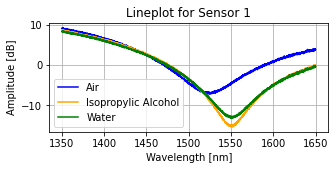

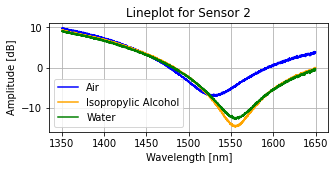

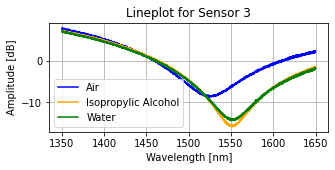

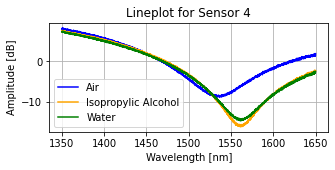

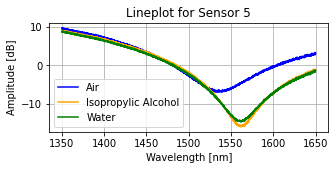

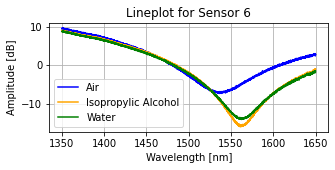

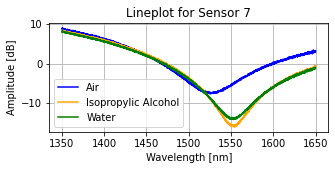

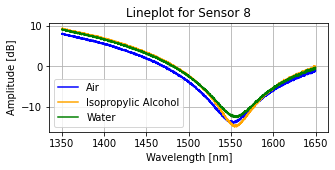

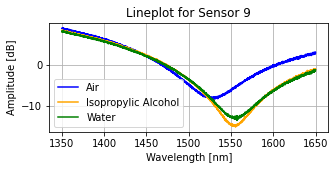

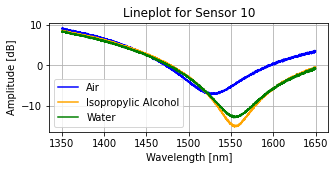

In [25]:
for i in range(1, 11):
  lineplot(f'Sensor {i}')


### Conclusions

The measurements for the Sensor 8 seem to be outliers, especially the air measurement.

## Corelation of dataset

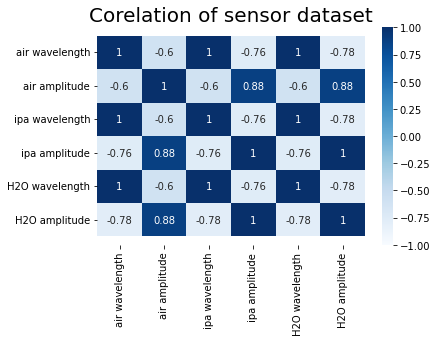

In [ ]:
heatmap(dataset, 'Corelation of sensor dataset')

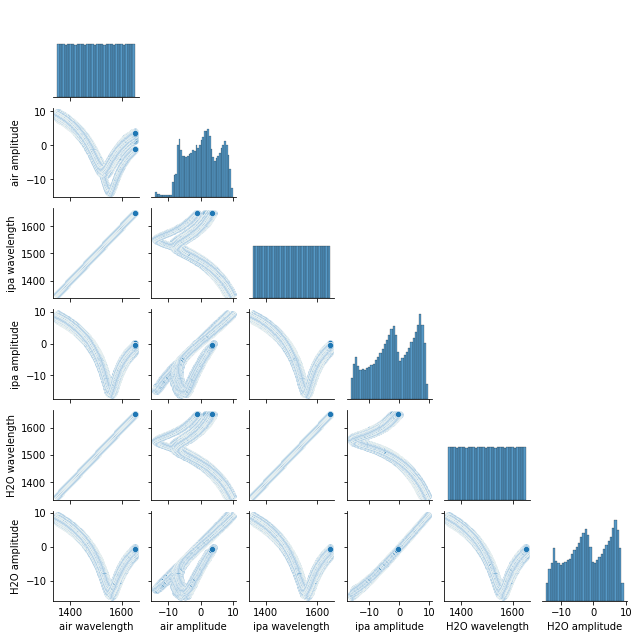

In [ ]:
sns.pairplot(dataset, height=1.5, corner=True)

### Conclusions
There is clearly very high corelation between air wavelenght and ipa wavelength (1.0) and H2O wavelenght (1.0). 
There is corelation between air amplitude and ipa amplitude (0.88) and water amplitude(0.88). There is inverse correlation between wavelength and amplitude.


# Delete Sensor 8 from dataset
The Lineplots show that water measurements for Sensor 8 might be outlier. 

In [47]:
# creating new dataset only for dataset without Sensor 8

dataset_remove = dataset.copy()

In [48]:
# Unique value in 'Number of sensor' column before removing
dataset_remove['Number of sensor'].unique()

array(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5',
       'Sensor 6', 'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10'],
      dtype=object)

In [49]:
dataset_remove.drop(dataset_remove.index[dataset_remove['Number of sensor'] == 'Sensor 8'], inplace = True)

In [50]:
# Unique value in 'Number of sensor' column after removing
dataset_remove['Number of sensor'].unique()

array(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5',
       'Sensor 6', 'Sensor 7', 'Sensor 9', 'Sensor 10'], dtype=object)

# Models - Wavelength

## Linear Regression 

In [18]:
modeling(dataset_remove[['air wavelength']], dataset_remove[['ipa wavelength', 'H2O wavelength']], model = LinearRegression())

Metrics for LinearRegression()
Validation : Mean absolute error:  0.0
Validation: R2 score:  1.0
Test : Mean absolute error:  0.0
Test: R2 score:  1.0


## Visualization


In [39]:
X = dataset_remove[['air wavelength']]
y = dataset_remove[['ipa wavelength', 'H2O wavelength']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds_val = model.predict(X_val)
preds_test = model.predict(X_test)
print (model.intercept_ )
print(model.coef_)

[0. 0.]
[[1.]
 [1.]]


In [21]:
# creating dataframe with true and predicted values 

df = y_test.copy()
df['ipa wavelength -preds'] = preds_test[:,0].tolist()
df['H2O wavelength -preds'] = preds_test[:,1].tolist()
df.sort_index(inplace=True)
df.head()

,ipa wavelength,H2O wavelength,ipa wavelength -preds,H2O wavelength -preds
6,1350.6,1350.6,1350.6,1350.6
17,1351.7,1351.7,1351.7,1351.7
29,1352.9,1352.9,1352.9,1352.9
30,1353.0,1353.0,1353.0,1353.0
34,1353.4,1353.4,1353.4,1353.4


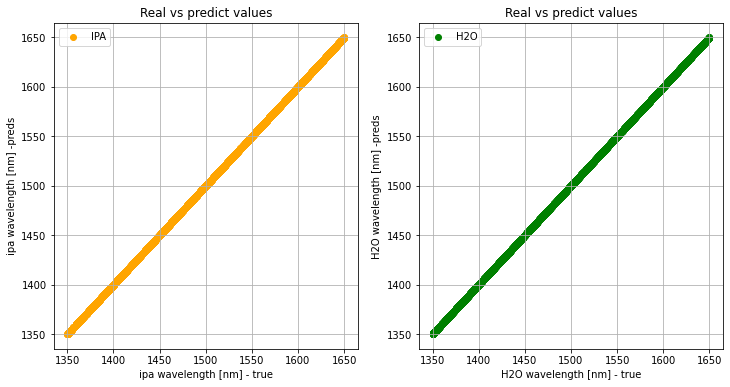

In [44]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6)) 

ax[0].scatter(df['ipa wavelength'], 
          df['ipa wavelength -preds'], 
          label='IPA', color = 'orange') 
ax[0].set_xlabel('ipa wavelength [nm] - true')
ax[0].set_ylabel('ipa wavelength [nm] -preds')

ax[0].grid() 
ax[0].legend(loc='upper left')
ax[0].set_title(f'Real vs predict values') 

ax[1].scatter (df['H2O wavelength'], 
          df['H2O wavelength -preds'], 
          label='H2O', color = 'green')
ax[1].set_xlabel('H2O wavelength [nm] - true')
ax[1].set_ylabel('H2O wavelength [nm] -preds')
ax[1].grid() 
ax[1].legend(loc='upper left')
ax[1].set_title(f'Real vs predict values')


plt.show()

In [54]:
# checking that the wavelength is always the same
dataset_check = dataset_remove.copy()
dataset_check['wavelength diffrence air - ipa'] = dataset_check['air wavelength'] - dataset_check['ipa wavelength']
dataset_check['wavelength diffrence air - H2O'] = dataset_check['air wavelength'] - dataset_check['H2O wavelength']
print ("Sum of 'wavelength diffrence air - ipa' column ", dataset_check['wavelength diffrence air - ipa'].sum())
print ("Sum of 'wavelength diffrence air - H2O' column ", dataset_check['wavelength diffrence air - H2O'].sum())

Sum of 'wavelength diffrence air - ipa' column  0.0
Sum of 'wavelength diffrence air - H2O' column  0.0


## Conclusion
The intercepts equal 0 and coefficiens 1. Wavelength prediction is unnecessary because the wavelength is the same for air, isopropylene alcohol, and water. The cell above shows that the sum of the wavelength differences is 0. 
It is necessary to predict what will be the amplitude for isopropylene and water for a given wavelength.

# Models - Amplitude

## Linear Regression

### All dataset

In [ ]:
# model 1

modeling(dataset[['air amplitude']], dataset[['ipa amplitude', 'H2O amplitude']], model = LinearRegression())

Metrics for LinearRegression()
Validation : Mean absolute error:  2.730732386897918
Validation: R2 score:  0.7696153307695299
Test : Mean absolute error:  2.744217338201765
Test: R2 score:  0.7699594077023819


### Without Sensor 8

In [ ]:
# model 2

modeling(dataset_remove[['air amplitude']], dataset_remove[['ipa amplitude', 'H2O amplitude']], model = LinearRegression())

Metrics for LinearRegression()
Validation : Mean absolute error:  2.674048833905707
Validation: R2 score:  0.7821796535014851
Test : Mean absolute error:  2.666532070668156
Test: R2 score:  0.7838285913622833


## Random Forest

### All dataset

In [ ]:
# model 3
# model based only on 'air amplitude'

modeling(x = dataset[['air amplitude']], y = dataset[['ipa amplitude', 'H2O amplitude']], model = RandomForestRegressor(random_state=1))

Metrics for RandomForestRegressor(random_state=1)
Validation : Mean absolute error:  2.480134260410199
Validation: R2 score:  0.7104096744553754
Test : Mean absolute error:  2.4627545337059606
Test: R2 score:  0.7111953010923686


In [43]:
# model 4
# model based on 'air amplitude' and 'air wavelength'

modeling(x = dataset[['air amplitude', 'air wavelength']], 
         y = dataset[['ipa amplitude', 'H2O amplitude']], model = RandomForestRegressor(random_state=1))

Metrics for RandomForestRegressor(random_state=1)
Validation : Mean absolute error:  0.2719727492254959
Validation: R2 score:  0.995261235112006
Test : Mean absolute error:  0.2723618700976339
Test: R2 score:  0.9953437925841256


#### Note
Clearly, adding the 'air wavelength' column to features improves the model's metrics.

### Without Sensor 8

In [55]:
# model 5
# model based on 'air amplitude' and 'air wavelength'

modeling(x = dataset_remove[['air amplitude', 'air wavelength']], 
         y = dataset_remove[['ipa amplitude', 'H2O amplitude']], model = RandomForestRegressor(random_state=1))

Metrics for RandomForestRegressor(random_state=1)
Validation : Mean absolute error:  0.20911520503123557
Validation: R2 score:  0.9967939317180382
Test : Mean absolute error:  0.20440883809061478
Test: R2 score:  0.9969100375092863


## Random Forest after MinMaxScaler

### Multi-output 

In [92]:
# model 6

scaler = MinMaxScaler()

X = scaler.fit_transform(dataset_remove[['air amplitude', 'air wavelength']])
y = dataset_remove[['ipa amplitude', 'H2O amplitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
preds_val = model.predict(X_val)
preds_test = model.predict(X_test)



print(f'Metrics for {model}')
print("Validation : Mean absolute error: ", mean_absolute_error(y_val, preds_val))
print("Validation: R2 score: ",r2_score(y_val, preds_val))
print("Test : Mean absolute error: ", mean_absolute_error(y_test, preds_test))
print("Test: R2 score: ",r2_score(y_test, preds_test))

Metrics for RandomForestRegressor(random_state=1)
Validation : Mean absolute error:  0.20953490881513187
Validation: R2 score:  0.9967818348560449
Test : Mean absolute error:  0.20457135313097008
Test: R2 score:  0.9969033075053033


### One output 'ipa amplitude'

In [93]:
#model 7

scaler = MinMaxScaler()

X = scaler.fit_transform(dataset_remove[['air amplitude', 'air wavelength']])
y = (dataset_remove['ipa amplitude'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
preds_val = model.predict(X_val)
preds_test = model.predict(X_test)



print(f'Metrics for {model}')
print("Validation : Mean absolute error: ", mean_absolute_error(y_val, preds_val))
print("Validation: R2 score: ",r2_score(y_val, preds_val))
print("Test : Mean absolute error: ", mean_absolute_error(y_test, preds_test))
print("Test: R2 score: ",r2_score(y_test, preds_test))

Metrics for RandomForestRegressor(random_state=1)
Validation : Mean absolute error:  0.21642827982947713
Validation: R2 score:  0.9965677067227635
Test : Mean absolute error:  0.21110142597667536
Test: R2 score:  0.9966191437801557


### One output 'H2O amplitude'

In [91]:
#model 8

scaler = MinMaxScaler()

X = scaler.fit_transform(dataset_remove[['air amplitude', 'air wavelength']])
y = (dataset_remove['H2O amplitude'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
preds_val = model.predict(X_val)
preds_test = model.predict(X_test)



print(f'Metrics for {model}')
print("Validation : Mean absolute error: ", mean_absolute_error(y_val, preds_val))
print("Validation: R2 score: ",r2_score(y_val, preds_val))
print("Test : Mean absolute error: ", mean_absolute_error(y_test, preds_test))
print("Test: R2 score: ",r2_score(y_test, preds_test))

Metrics for RandomForestRegressor(random_state=1)
Validation : Mean absolute error:  0.20236818091724507
Validation: R2 score:  0.9970746663596682
Test : Mean absolute error:  0.19860426414439092
Test: R2 score:  0.9971777096946187


## Visualization 
Results of Random Forest Multi-output without Sensor 8 (model 5)

In [94]:
# Prepare dataset for vizualization
X = dataset_remove[['air amplitude', 'air wavelength']]
y = dataset_remove[['ipa amplitude', 'H2O amplitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
preds_val = model.predict(X_val)
preds_test = model.predict(X_test)

y_test_back = scaler.inverse_transform(y_test)
preds_test_back= scaler.inverse_transform(preds_test)
df = pd.DataFrame()

df = y_test.copy()
df['ipa amplitude -preds'] = preds_test[:,0].tolist()
df['H2O amplitude -preds'] = preds_test[:,1].tolist()
df.sort_index(inplace=True)
df.head()

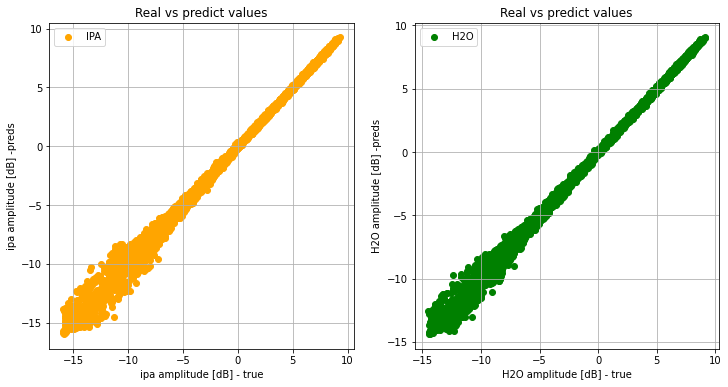

In [97]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6)) 

ax[0].scatter(df['ipa amplitude'], 
          df['ipa amplitude -preds'], 
          label='IPA', color = 'orange') 
ax[0].set_xlabel('ipa amplitude [dB] - true')
ax[0].set_ylabel('ipa amplitude [dB] -preds')

ax[0].grid() 
ax[0].legend(loc='upper left')
ax[0].set_title(f'Real vs predict values') 

ax[1].scatter (df['H2O amplitude'], 
          df['H2O amplitude -preds'], 
          label='H2O', color = 'green')
ax[1].set_xlabel('H2O amplitude [dB] - true')
ax[1].set_ylabel('H2O amplitude [dB] -preds')
ax[1].grid() 
ax[1].legend(loc='upper left')
ax[1].set_title(f'Real vs predict values')


plt.show()

# Conclusions



1.   The Sensor 8 measurement should be treated as an outlier and removed.

2.   The data shows that there is no need to predict the wavelength for isopropylene and water, but their amplitudes at a given wavelength.

3.   Predicting the amplitude based only on the amplitude of the air does not give satisfactory results (Random Forest Mae around 2.4523) . Therefore, the wavelengths in air must be taken into model when predicting the amplitude. 

4.   Standardization does not significantly improved the quality of the amplitude model.

5.   The final model for the amplitude is a Random Forest (model 5) based on cleaned data (sensor 8 measurements removed) and with two outputs. The selected model is not overfitting and its test set Mae is around 0.209, r2 around 0.997.

6.   The metrics of the final model are not satisfactory. The aim should be to minimize the MAE at 0.01.

7.   From the graph of real and predicted values for Random Forest (model 5), it can be read that the greatest discrepancy of the results is for very small amplitudes (below -7). Amplitude values ​​below -7 are the most important to create a proper wavelength vs. amplitude plot, and it is these values ​​that are crucial for sensor verification.
















# Recomendations

1.   Using the os/glob/Path libraries to automate loading files.
2.   Selection of hyperparameters for the Random Forest model.
3.   Building a model of neural networks.
4.   Colecting more data.
5.   Conversation with specialists and adding an additional parameter to verify the sensors.
6.   Setting a new goal with business: maybe you don't have to deal with measurements in the laboratory and focus on verifying sensors already during production through the use of AI algorithms.



